In [12]:
import pandas as pd
import numpy as np
from ape_risk import strategies

In [13]:
params = [0, 0.005]
C = np.asarray([[1, 0.5, 0.8], [0.5, 1, 0.4], [0.8, 0.4, 1]])
scale = np.linalg.cholesky(C).tolist()
shift = np.asarray([0, 0, 0]).tolist()

In [14]:
C

array([[1. , 0.5, 0.8],
       [0.5, 1. , 0.4],
       [0.8, 0.4, 1. ]])

In [15]:
scale

[[1.0, 0.0, 0.0],
 [0.5, 0.8660254037844386, 0.0],
 [0.8, 0.0, 0.5999999999999999]]

In [16]:
strat = strategies.multi_gbms(initial_value=1.0, num_points=10000, num_rvs=3, params=params, scale=scale, shift=shift)

In [17]:
ex = strat.example()
ex

array([[[0.99505027, 0.99858007, 0.99278772]],

       [[0.99929894, 0.99084806, 0.99977272]],

       [[1.00119315, 0.9947639 , 1.00268984]],

       ...,

       [[0.49278631, 1.08908551, 0.5221809 ]],

       [[0.49261518, 1.08937637, 0.52148893]],

       [[0.49410656, 1.09040202, 0.52209399]]])

In [18]:
ex = ex.reshape(10000, 3)
ex

array([[0.99505027, 0.99858007, 0.99278772],
       [0.99929894, 0.99084806, 0.99977272],
       [1.00119315, 0.9947639 , 1.00268984],
       ...,
       [0.49278631, 1.08908551, 0.5221809 ],
       [0.49261518, 1.08937637, 0.52148893],
       [0.49410656, 1.09040202, 0.52209399]])

In [19]:
df = pd.DataFrame(ex, columns=['price0', 'price1', 'price2'])

In [20]:
df

,price0,price1,price2
0,0.995050,0.998580,0.992788
1,0.999299,0.990848,0.999773
2,1.001193,0.994764,1.002690
3,0.999771,0.993993,1.009726
4,1.000601,0.997867,1.015737
...,...,...,...
9995,0.492032,1.090191,0.521837
9996,0.490173,1.089875,0.521239
9997,0.492786,1.089086,0.522181
9998,0.492615,1.089376,0.521489


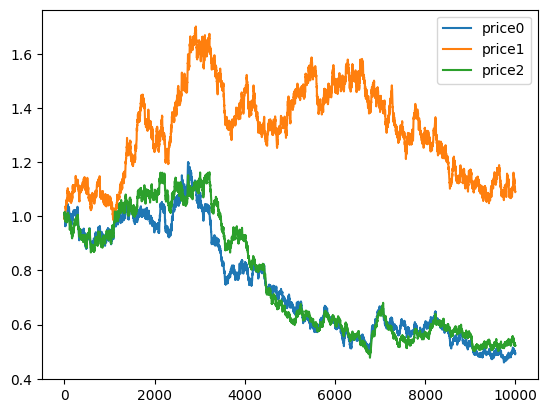

In [23]:
ax = df.plot()
ax.get_figure().savefig('multi_example.png')

In [24]:
df.to_csv("../tests/helpers/multi_example.csv", index=False)